# MATH 441 Optimization Problems

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
import networkx as nx

## Combinatorial Optimization

[Combinatorial optimization](https://en.wikipedia.org/wiki/Combinatorial_optimization) consists of finding an optimal solution from a finite set of objects, where the set of feasible solutions is discrete, or can be reduced to a discrete set.

## Examples

### Routing

Find the shortest closed path connecting all points in a finite set.

See [Wikipedia: Travelling Salesperson Problem](https://en.wikipedia.org/wiki/Travelling_salesman_problem) and [Wikipedia: Vehicle Routing Problem](https://en.wikipedia.org/wiki/Vehicle_routing_problem).

### Scheduling

Assign employees to different shifts subject to constraints such as:

* Each employee can only work only on certain days
* There must be a minimum number of employees in each shift
* Employees choose days for holidays
* Employees work one shift per day

See [Wikipedia: Scheduling Problem](https://en.wikipedia.org/wiki/Nurse_scheduling_problem) and [Wikipedia: Job Scheduling Problem](https://en.wikipedia.org/wiki/Job-shop_scheduling).

### Assignment

Assign agents to tasks to minimize the total cost subject to constraints such as:

* Each agent is assigned task
* Each task is assigned an agent
* Agent is assigned a task for which they are qualified

See [Wikipedia: Assignment Problem](https://en.wikipedia.org/wiki/Assignment_problem).

### Packing

Items of different sizes must be packed into a finite number of containers (each of a fixed capacity) in a way that minimizes the number of bins used. 

See [Wikipedia: Bin Packing Problem](https://en.wikipedia.org/wiki/Bin_packing_problem) and [Wikipedia: Knapsack Problem](https://en.wikipedia.org/wiki/Knapsack_problem).

### Set Covering

Given a set $U$ of $n$ elements and a collection $S$ of $m$ subsets whose union equals $U$, identify the smallest subcollection of $S$ whose union equals $U$.

See [Wikipedia: Set Covering Problem](https://en.wikipedia.org/wiki/Set_cover_problem).

### Games

* Given the current state of a chess board, find the move that maximizes your chance of winning.
* Find any feasible solution of a Sudoku game.

### Integer Programming

Maximize $\mathbf{c}^T \mathbf{x}$ subject to $A \mathbf{x} \leq \mathbf{b}$, $\mathbf{x} \geq 0$, $\mathbf{x} \in \mathbb{Z}^n$.

See [Wikipedia: Integer Programming](https://en.wikipedia.org/wiki/Integer_programming).

## Finding Solutions

### Brute Force

There are finitely many feasible solutions. Find all of them, compute the value of the objective function and determine the optimal solution.

### Integer Programming

Formulate the problem as an integer programming problem and use a solver such as `scipy.optimize.linprog` or `cvxpy`. How do these solvers work? Branch and bound algorithm ...

### Search Algorithms

Dynamic programming, branch-and-bound, branch-and-cut, ...

### Approximation Algorithms

Greedy algorithms, genetic algorithms, local search, ...

See [Wikipedia: Approximation Algorithms](https://en.wikipedia.org/wiki/Approximation_algorithm).

## Routing

Consider the classic Travelling Salesperson Problem (TSP): Find the shortest closed path which connects all points in a finite set.

### Attempt 1: Formulate as an integer programming problem

Consider the complete graph $G = (V,E)$. Enumerate the nodes $i=0,\dots,N-1$.

Let $x_{ij}$ be 1 if the path includes edge from node $i$ to $j$ and 0 otherwise.

Let $c_{ij}$ be the distance (ie. cost) to travel from node $i$ to $j$.

The objective function is the total cost of the path:

$$
\sum_i \sum_{j, j \not= i} c_{ij} x_{ij}
$$

There is one edge from each node in the path:

$$
\sum_{j, j\not=i} x_{ij} = 1 , \text{for each} \ i
$$

There is one edge to each node in the path:

$$
\sum_{i, i\not=j} x_{ij} = 1 , \text{for each} \ j
$$

How do we guarantee that the path is not disconnected? We need further constraints such as MTZ or DFJ. This is complicated! Maybe we should try something simpler. Brute force!

### Attempt 2: Brute Force

In combinatorial optimization, the brute force method is to enumerate all possible solutions and then find the optimal solution. Check out the [Coding Train](https://www.youtube.com/watch?v=BAejnwN4Ccw) for a great demonstration on how to visualize and implement the brute force method. See also [Google OR Tools](https://developers.google.com/optimization/routing) for more optimization examples.

How many tours are there in the routing problem? Let $n = |V|$ be the number of nodes then we have $(n-1)!/2$ possible solutions!

In [13]:
from scipy.special import factorial

In [14]:
n = 11
factorial(n-1)/2

1814400.0

#### Plot Tours

Let's generate and visualize some random points in 2D.

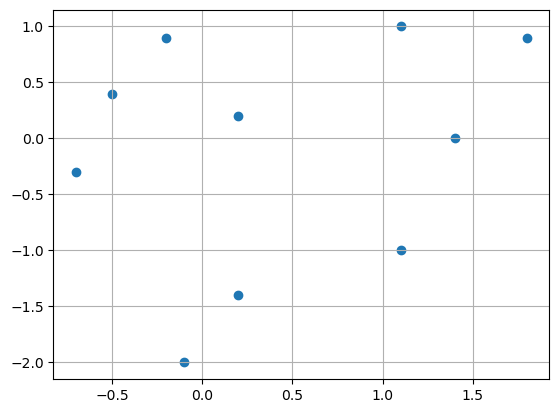

In [39]:
V = np.array([[1.1,-1.0],[0.2,-1.4],[-0.2,0.9],[-0.7,-0.3],[1.4,0.],
              [1.1,1.],[-0.1,-2.],[-0.5,0.4],[1.8,0.9],[0.2,0.2]])
plt.scatter(V[:,0],V[:,1])
plt.grid(True)
plt.show()

A **tour** of the points $V = [(x_i,y_i)]$ is a permutation of the indices $i=0,\dors,N-1$. Write a function which takes a matrix of points `V` and list of indices `tour` and plots the tour.

In [40]:
def plot_tour(V,tour,figsize=(6,5)):
    V = np.array(V)
    n = V.shape[0]
    edges = [(tour[i],tour[i+1]) for i in range(0,len(tour)-1)] + [(tour[-1],tour[0])]
    G = nx.Graph()
    G.add_nodes_from(range(n))
    G.add_edges_from(edges)
    plt.figure(figsize=figsize)
    nx.draw(G,pos=V,with_labels=True,node_color='lightblue')
    plt.show()

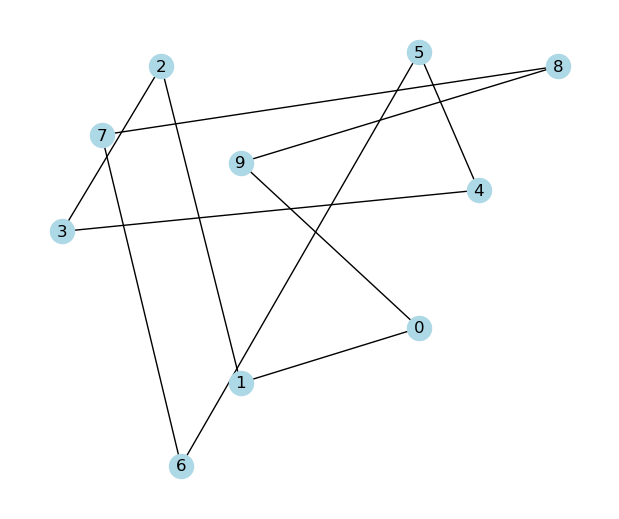

In [42]:
tour = [0,1,2,3,4,5,6,7,8,9]
plot_tour(V,tour)

#### Cost Matrix

Write function called `cost_matrix` which takes a $N \times 2$ matrix $V$ representing the plane coordinates $(x,y)$ of $N$ points in 2D and returns the cost matrix $C = [c_{ij}]$ where

$$
c_{ij} = \sqrt{ (x_j - x_i)^2 + (y_j - y_i)^2 }
$$

In [43]:
def cost_matrix(V):
    V = np.array(V)
    n = V.shape[0]
    C = np.zeros((n,n))
    for i in range(1,n):
        for j in range(0,i):
            C[i,j] = np.sqrt((V[j,0] - V[i,0])**2 + (V[j,1] - V[i,1])**2)
            C[j,i] = C[i,j]
    return C

In [44]:
V = [(0,0),(1,0),(1,1),(0,1)]
C = cost_matrix(V)
print(C)

[[0.         1.         1.41421356 1.        ]
 [1.         0.         1.         1.41421356]
 [1.41421356 1.         0.         1.        ]
 [1.         1.41421356 1.         0.        ]]


#### Tour Cost

Write a function called `tour_cost` which takes a cost matrix `C` and sequence `tour` and returns the cost

$$
\sum c_{ij} x_{ij}
$$

In [45]:
def tour_cost(C,tour):
    n = len(tour)
    cost = 0
    for i in range(n-1):
        cost += C[tour[i],tour[i+1]]
    cost += C[tour[-1],tour[0]]
    return cost

19.04910955586131


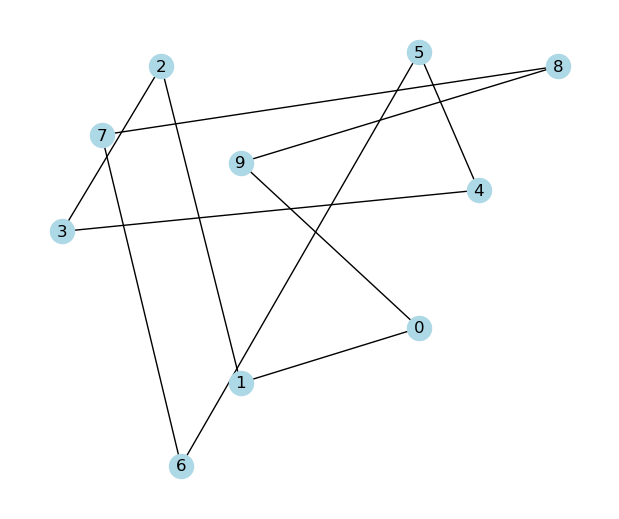

In [47]:
V = np.array([[1.1,-1.0],[0.2,-1.4],[-0.2,0.9],[-0.7,-0.3],[1.4,0.],
              [1.1,1.],[-0.1,-2.],[-0.5,0.4],[1.8,0.9],[0.2,0.2]])
C = cost_matrix(V)
tour = [0,1,2,3,4,5,6,7,8,9]

cost = tour_cost(C,tour)
print(cost)
plot_tour(V,tour)

#### Brute Force

Write a function called `brute_force` which takes a matrix $V$ with 2 columns representing the coordinates of the nodes in a graph and returns the optimal tour (computed by brute force) as a sequence of indices (as a NumPy array) and the total cost.

In [48]:
from itertools import permutations

def brute_force(V):
    n = V.shape[0]
    tours = permutations(range(n))
    C = cost_matrix(V)
    optimal_cost = None
    for tour in tours:
        cost = tour_cost(C,tour)
        if optimal_cost is None or cost < optimal_cost:
            optimal_cost = cost
            optimal_tour = np.array(tour)
    return optimal_tour,optimal_cost

Try a simple example where we can see the optimal tour:

9.515996434540419


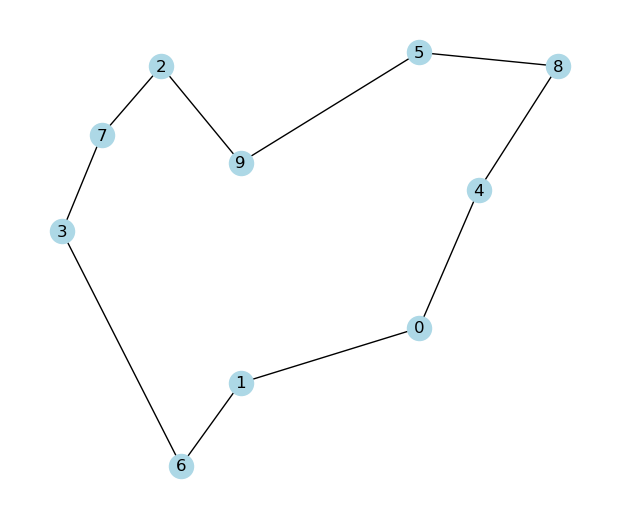

In [51]:
V = np.array([[1.1,-1.0],[0.2,-1.4],[-0.2,0.9],[-0.7,-0.3],[1.4,0.],
              [1.1,1.],[-0.1,-2.],[-0.5,0.4],[1.8,0.9],[0.2,0.2]])
C = cost_matrix(V)
tour,cost = brute_force(V)

print(cost)
plot_tour(V,tour)

Now let's generate some random data:

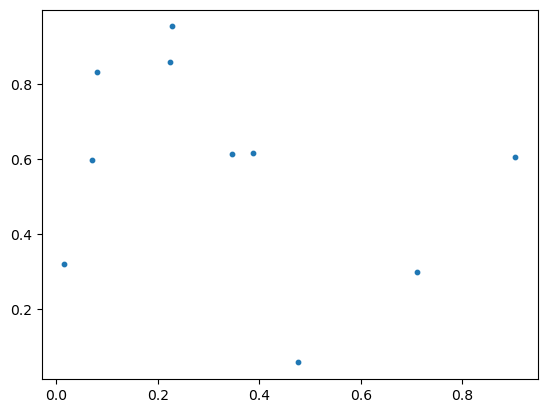

In [11]:
n = 10
V = np.random.rand(n,2)
plt.scatter(V[:,0],V[:,1],s=10)
plt.show()

Use the Jupyter magic `%%time` to record the time it takes to compute the optimal solution by brute force:

In [12]:
%%time
optimal_tour, optimal_cost = brute_force(V)

CPU times: user 13.3 s, sys: 167 ms, total: 13.4 s
Wall time: 14.8 s


In [13]:
optimal_cost

2.8666372450977784

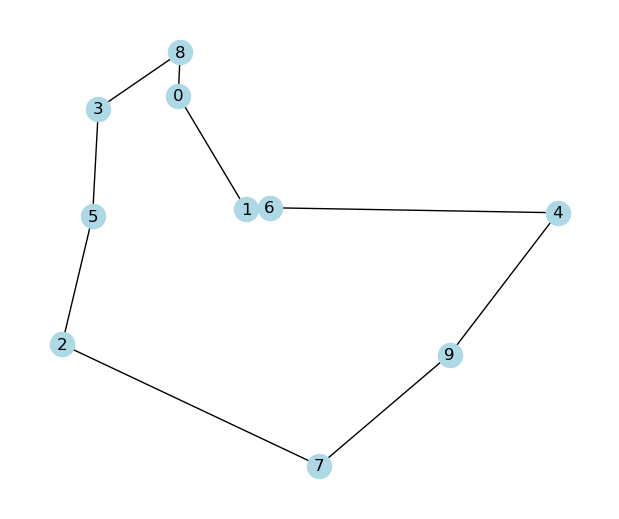

In [14]:
plot_tour(V,optimal_tour)

## Nearest Neighbor

If we just want a reasonable tour to start with we can use the nearest neighbor heuristic which constructs a tour by picking the closest node as the next node in the tour. Write a function called `nearest_neighbor` which takes a matrix $V$ with 2 columns representing the coordinates of nodes in a graph and returns the nearest neighbor tour as a sequence of indices (as a NumPy array) and the total cost.

In [15]:
def nearest_neighbor(V,start=0):
    n = V.shape[0]
    C = cost_matrix(V)
    tour = [start]
    nodes = list(range(n))
    nodes.remove(start)
    for i in range(1,n):
        next_i = np.argmin(C[tour[-1],nodes])
        next_node = nodes[next_i]
        tour.append(next_node)
        nodes.pop(next_i)
    cost = tour_cost(C,tour)
    return tour,cost

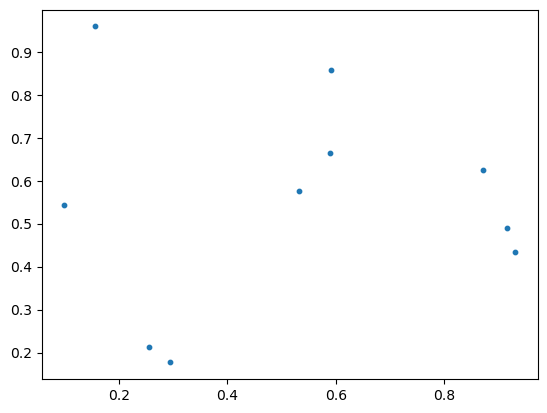

In [16]:
n = 10
V = np.random.rand(n,2)
plt.scatter(V[:,0],V[:,1],s=10)
plt.show()

In [17]:
optimal_tour, optimal_cost = brute_force(V)

In [18]:
optimal_cost

2.8122333122130208

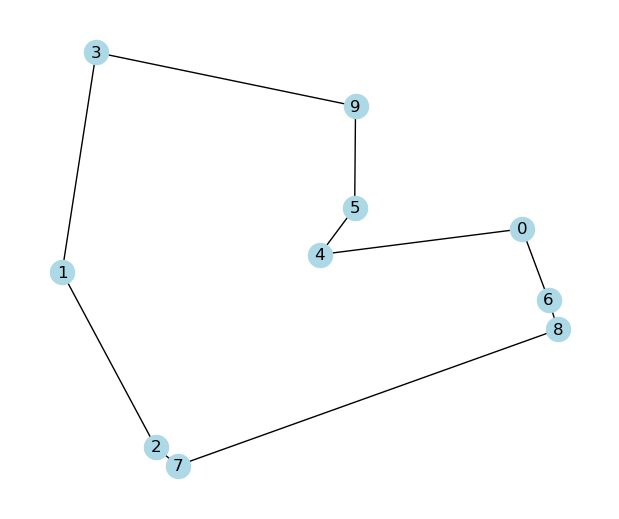

In [19]:
plot_tour(V,optimal_tour)

Now compute the nearest neighbor approximation:

In [20]:
tour,cost = nearest_neighbor(V)

In [21]:
cost

3.0192142949664253

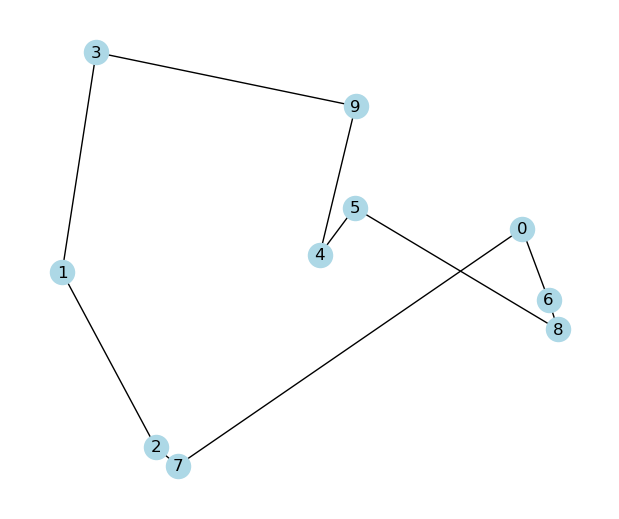

In [22]:
plot_tour(V,tour)

Try nearest neighbor for different starting points:

3.099145459840559


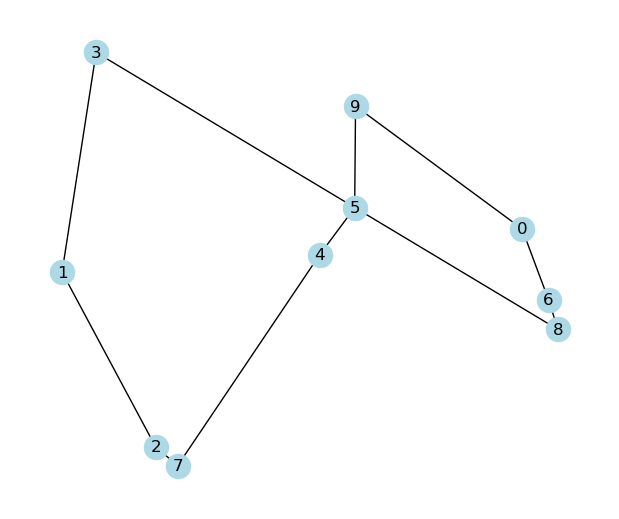

In [23]:
tour,cost = nearest_neighbor(V,start=1)
print(cost)
plot_tour(V,tour)

3.005144407908593


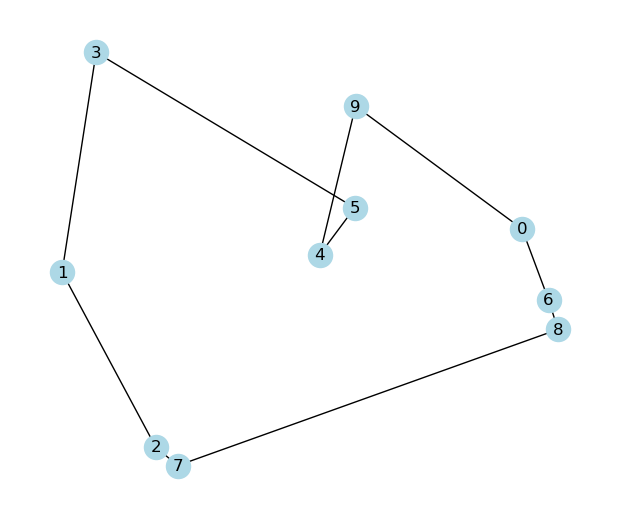

In [24]:
tour,cost = nearest_neighbor(V,start=5)
print(cost)
plot_tour(V,tour)

Let's pump it up to $n=100$.

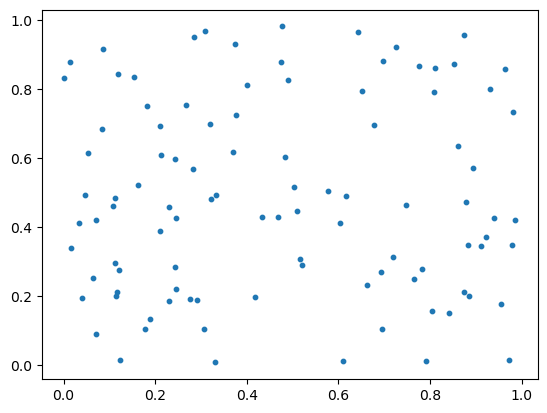

In [25]:
n = 100
V = np.random.rand(n,2)
plt.scatter(V[:,0],V[:,1],s=10)
plt.show()

9.911233044586604


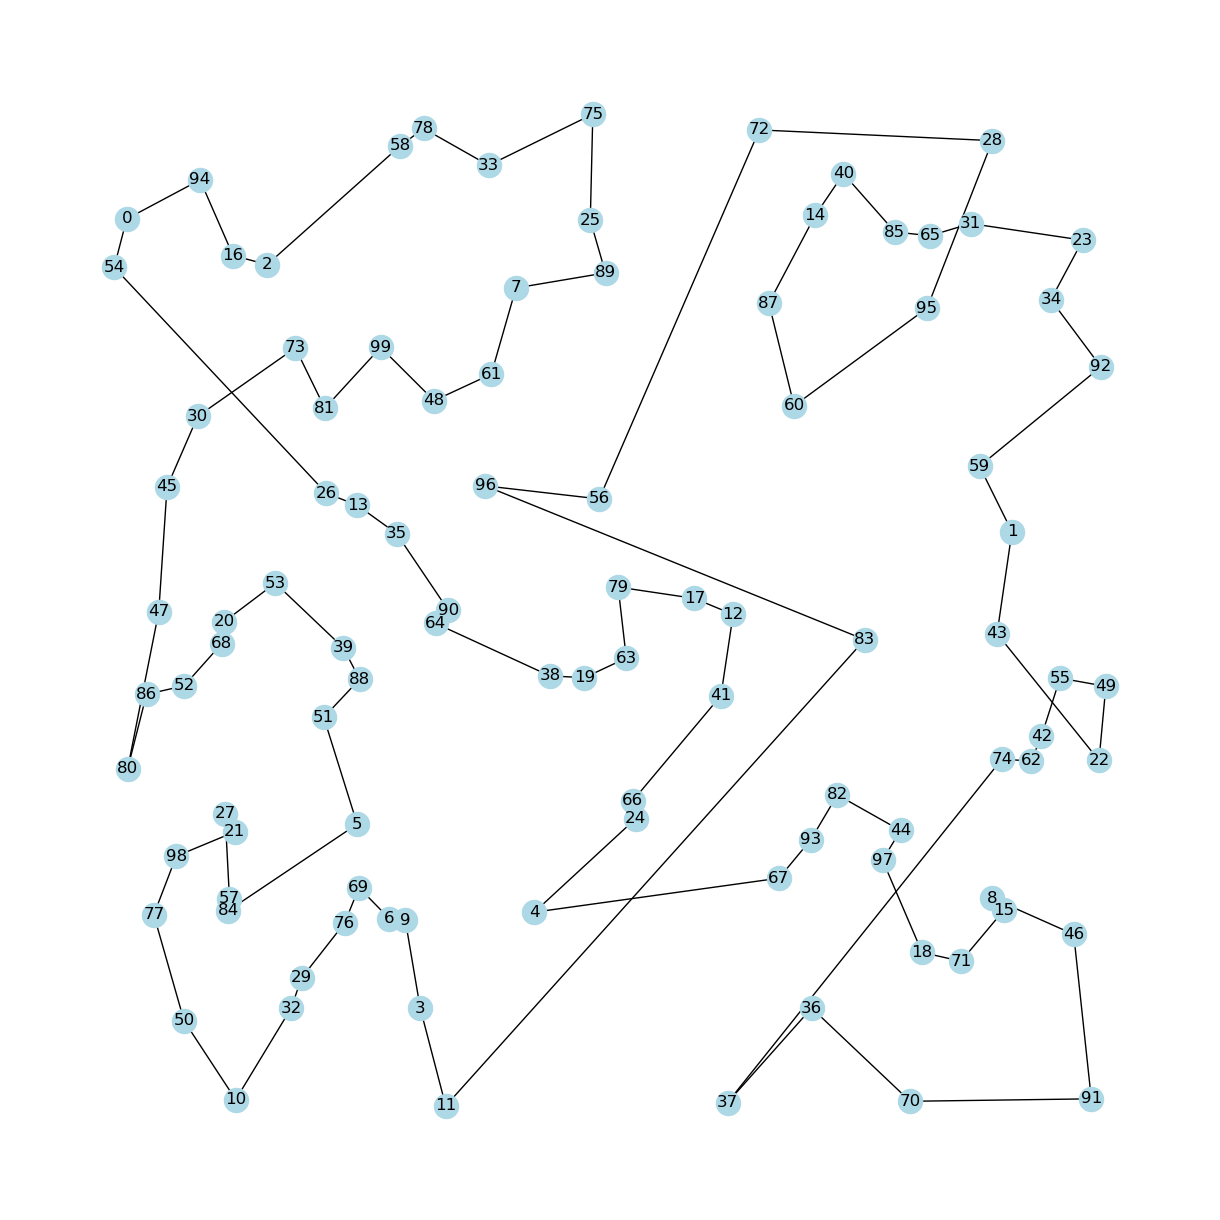

In [26]:
tour,cost = nearest_neighbor(V,start=11)
print(cost)
plot_tour(V,tour,figsize=(12,12))